In [26]:
pip install tensorflow

You should consider upgrading via the '/Users/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Gradient Descent 

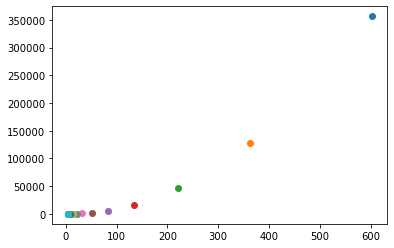

In [34]:
x=np.linspace(4,6,20)
# this is your function 
y=(x-5)**2
plt.scatter(x,y,color="black")
starting_point=1000
updated_point=starting_point
l=[]
for i in range(100):
    eta=-0.2
    updated_point=updated_point+eta*2*(updated_point-5)
    l.append(updated_point)
    plt.scatter(updated_point,(updated_point-5)**2)
    

In [35]:
# no matter where you start from, you will eventually reach your optimal point 
# in this case, optimal point is 5
l

[602.0,
 363.2,
 219.92,
 133.952,
 82.37119999999999,
 51.42271999999999,
 32.85363199999999,
 21.712179199999994,
 15.027307519999997,
 11.016384511999998,
 8.609830707199999,
 7.165898424319999,
 6.299539054592,
 5.779723432755199,
 5.46783405965312,
 5.280700435791871,
 5.168420261475123,
 5.101052156885074,
 5.060631294131045,
 5.036378776478627,
 5.021827265887176,
 5.013096359532306,
 5.007857815719384,
 5.004714689431631,
 5.0028288136589785,
 5.001697288195387,
 5.001018372917232,
 5.00061102375034,
 5.000366614250204,
 5.000219968550122,
 5.000131981130074,
 5.000079188678044,
 5.000047513206827,
 5.000028507924096,
 5.000017104754457,
 5.000010262852674,
 5.000006157711605,
 5.000003694626963,
 5.000002216776178,
 5.0000013300657065,
 5.000000798039424,
 5.0000004788236545,
 5.000000287294193,
 5.000000172376516,
 5.00000010342591,
 5.000000062055546,
 5.0000000372333275,
 5.0000000223399965,
 5.000000013403998,
 5.000000008042399,
 5.00000000482544,
 5.000000002895264,
 5.0

# perceptron 

In [37]:
class Perceptron():

    def __init__(self, no_of_inputs, threshold=10000, learning_rate=0.001):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 2
        else:
          activation = 1         
        return activation
    def predict_batch(self,inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(summation>0,2,1)
    
# label => y variable 
# training_inputs => x variables 
    def train(self, training_inputs, labels):
                for _ in range(self.threshold):
                    for inputs, label in zip(training_inputs, labels):
                        prediction = self.predict(inputs)

# how updating is happening: new weights = old weights + (learning rate) * (derivative) 
                        self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                        self.weights[0] += self.learning_rate * (label - prediction)


In [38]:
# fun data is linear data 
data=pd.read_csv("fun-data.csv")

In [39]:
data.head()

,f1,f2,f3,class
0,8.477937,0.436289,40.389470,1
1,6.704407,6.237227,65.349761,1
2,4.835130,4.500931,52.093300,1
3,5.179056,9.523951,79.049424,1
4,5.030426,4.569668,51.970028,1


In [40]:
data["class"].value_counts()

1    100
2    100
Name: class, dtype: int64

In [41]:
perceptron = Perceptron(no_of_inputs=3)
perceptron.train(data.iloc[:,:-1].values,np.array(data.iloc[:,-1]))

In [42]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

In [43]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(perceptron.predict_batch(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

1.0

# PERCERPTRON from sklearn

- Perceptron model from sklearn 

In [45]:
from sklearn.linear_model import Perceptron

In [46]:
# this is a  non linear data
data=pd.read_csv("logisticdrawback.csv")

In [47]:
data

,f1,f2,class
0,-1.335474,1.376236,1
1,-1.918388,-0.528479,1
2,0.015120,0.020986,1
3,-0.131351,0.119043,1
4,0.794606,1.421984,1
...,...,...,...
295,-0.413737,-8.881763,3
296,-6.280134,4.969648,3
297,-0.946822,9.196240,3
298,-6.139916,5.699856,3


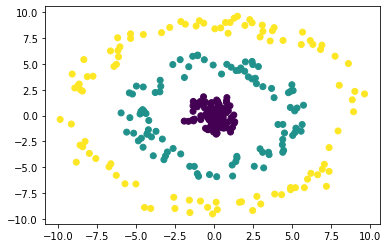

In [48]:
plt.scatter(data.f1,data.f2,c=data["class"])

In [49]:
model=Perceptron()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1] ,test_size=0.3, shuffle=True) 

In [51]:
model.fit(X_train,y_train)

Perceptron()

In [52]:
metrics.accuracy_score(model.predict(data.iloc[:,:-1].values),np.array(data.iloc[:,-1]))

0.3466666666666667

In [53]:
data=pd.read_csv("logisticdrawback.csv")

In [54]:
perceptron.weights

array([ 1.532     ,  0.384272  ,  0.64909767, -0.12957911])

# MLP

# logistic regression with mlp

In [103]:
# converting text data into numbers. The 3 output classes are numbers now
# NN can't handle text data 
import seaborn as sns 
iris=sns.load_dataset("iris")
def f(x):
    if x=="setosa":
        return 0
    if x=="versicolor":
        return 1
    if x=="virginica":
        return 2
iris["species"]=iris["species"].apply(f)

In [104]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [105]:
import tensorflow as tf


import numpy as np


'''split into training and testing data'''
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:4],iris.iloc[:,-1], test_size=0.2)
y__test = tf.keras.utils.to_categorical(y_test)
y__train = tf.keras.utils.to_categorical(y_train)


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(3, activation='softmax',input_dim=4))

'''
- SGD means Mini Batch Gradient Descent
- lr = learning rate
- decay - ignore for now
- momentum - this values is the value of Rho from the momentum formula in the class ppt slides
- nesterov - uses nesterov momentum instead of normal momentum '''
sgd =  tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


'''
- for a classification problem the loss function is: categorical crossentropy and metrics is: accuracy
'''
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
'''
- 32: in each of the bins in Mini Batch Gradient Descent, there will be 32 data points'''
model.fit(x_train.values, y__train,
          epochs=20,
          batch_size=32)
score = model.evaluate(x_test, y__test)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 1.5518 - accuracy: 0.6667
Epoch 2/20
4/4 [==============================] - 0s 9ms/step - loss: 1.0650 - accuracy: 0.4083
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.8656 - accuracy: 0.5500
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7841 - accuracy: 0.4667
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.4833
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6167
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.5917
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.6583
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7500
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.6833
Epoch 11/20
4/4 [======================

In [106]:
# after 20 epochs we have an accuracy of 96%
score 

[0.4270016849040985, 0.9333333373069763]

In [107]:
metrics.accuracy_score(model.predict_classes(x_test),y_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [108]:
metrics.accuracy_score(model.predict(x_test),y_test)

1/1 [==============================] - 0s 61ms/step


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [109]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [110]:
# this model has 12 weights 
weights

array([[ 0.6890839 ,  0.45398813,  0.10660571],
       [ 1.1246921 ,  0.12976198, -0.45127007],
       [-0.95009327,  0.42313573,  1.1857368 ],
       [-0.7573685 , -0.22036165,  0.09865615]], dtype=float32)

In [111]:
# this model has 3 biases 
biases

array([ 0.10653022,  0.10421917, -0.2107494 ], dtype=float32)

In [114]:
model.predict_classes(x_test)


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [113]:
model.predict(x_test)

1/1 [==============================] - 0s 27ms/step


array([[0.91431624, 0.08019133, 0.00549242],
       [0.8587591 , 0.1294612 , 0.01177975],
       [0.9054653 , 0.08828231, 0.00625243],
       [0.8848791 , 0.10737236, 0.00774858],
       [0.03199089, 0.48973933, 0.47826976],
       [0.9118614 , 0.08285152, 0.00528708],
       [0.02589485, 0.5040155 , 0.47008967],
       [0.00881509, 0.40302318, 0.5881617 ],
       [0.01219183, 0.43024674, 0.55756146],
       [0.88834715, 0.10444786, 0.00720494],
       [0.00315719, 0.30749235, 0.6893505 ],
       [0.00603016, 0.36575538, 0.6282145 ],
       [0.00642026, 0.40488702, 0.58869267],
       [0.1133413 , 0.5628074 , 0.3238513 ],
       [0.01607358, 0.4519027 , 0.5320238 ],
       [0.00596139, 0.3490543 , 0.6449843 ],
       [0.01993818, 0.49742782, 0.48263398],
       [0.0066462 , 0.35271034, 0.64064354],
       [0.05939824, 0.5231788 , 0.41742292],
       [0.00923082, 0.418305  , 0.57246417],
       [0.04837894, 0.5485375 , 0.4030836 ],
       [0.8861877 , 0.1054256 , 0.00838666],
       [0.

- Above, we ran a logistic regression neural network 
- to verify, we run a normal Logistic Regression model
- And see if the values of weights and biases are the same 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [65]:
l=LogisticRegression()
l.fit(x_train, y_train)

LogisticRegression()

In [66]:
l.intercept_

array([ 10.03873962,   2.91970259, -12.9584422 ])

In [67]:
l.coef_

array([[-0.4722972 ,  0.87498762, -2.4035953 , -1.01309107],
       [ 0.36760037, -0.28867936, -0.21167162, -0.82088848],
       [ 0.10469683, -0.58630826,  2.61526691,  1.83397955]])

In [68]:
l=LogisticRegression()
l.fit(x_train,y_train)
confusion_matrix(y_test,l.predict(x_test))

array([[11,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 10]])

In [69]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# problems with traditional ann

In [ ]:
# easiest way to import the mnist data set 
from keras.datasets import mnist

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# we want to convert an image into a numerical data 

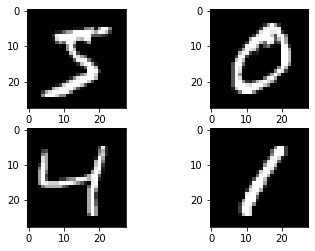

In [90]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [72]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [91]:
# this library already gives you the train-test split data
X_train.shape

(60000, 28, 28)

In [ ]:
# running a classification neural network model on MNIST data

In [74]:
# converting the 28x28 matrix to a vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

# here, we're rescaling the data. Dividing the data by 255 so that each number can be inbetween 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [75]:
X_train.shape

(60000, 784)

In [76]:
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes =10

In [77]:
num_classes=10
num_pixels=784

In [78]:

model = tf.keras.models.Sequential()
# adding a layer of 1000 neurons 
model.add(tf.keras.layers.Dense(1000, input_dim=num_pixels, activation='relu'))
# activation function here is softmax bc we want the probability as the end output 
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [79]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1000)              785000    
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [82]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024, verbose=1)

Epoch 1/10
59/59 [==============================] - 3s 51ms/step - loss: 0.4850 - accuracy: 0.8651 - val_loss: 0.2293 - val_accuracy: 0.9363
Epoch 2/10
59/59 [==============================] - 3s 49ms/step - loss: 0.1991 - accuracy: 0.9442 - val_loss: 0.1618 - val_accuracy: 0.9537
Epoch 3/10
59/59 [==============================] - 2s 41ms/step - loss: 0.1434 - accuracy: 0.9602 - val_loss: 0.1331 - val_accuracy: 0.9615
Epoch 4/10
59/59 [==============================] - 2s 41ms/step - loss: 0.1120 - accuracy: 0.9689 - val_loss: 0.1083 - val_accuracy: 0.9690
Epoch 5/10
59/59 [==============================] - 3s 42ms/step - loss: 0.0885 - accuracy: 0.9758 - val_loss: 0.0949 - val_accuracy: 0.9712
Epoch 6/10
59/59 [==============================] - 3s 46ms/step - loss: 0.0721 - accuracy: 0.9800 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 7/10
59/59 [==============================] - 2s 40ms/step - loss: 0.0602 - accuracy: 0.9837 - val_loss: 0.0797 - val_accuracy: 0.9754
Epoch 8/10
59

In [92]:
# our model is giving 96% accuracy 

In [83]:
(X_train1, y_train), (X_test1, y_test) = tf.keras.datasets.mnist.load_data()


In [94]:
# when we shift the handwritten 1 to the right ANN predicts it to be a 0 and then a 4
# this is why ANN fails to classify visual data
# CNNs were created to solve this issue 

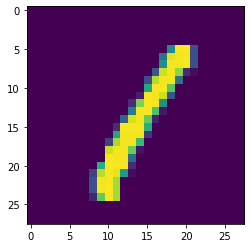

In [95]:
pic=np.zeros((28,28))
pic=X_train1[3,:,:].copy()
pic2=X_train1[3,:,:].copy()
plt.imshow(pic)

In [96]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 28ms/step


1

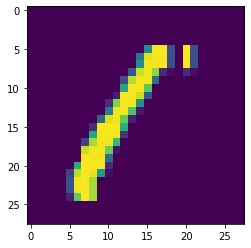

In [97]:
for i in range(pic.shape[0]):
  if i<20:
    pic[:,i]=pic[:,i+3]
plt.imshow(pic)

In [98]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 26ms/step


0

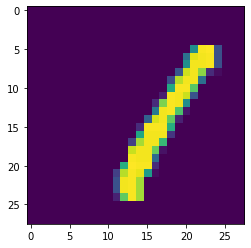

In [99]:
pic=np.zeros((28,28))

for i in range(pic.shape[0]):
  if  (i<25):
    pic[:,i+3]=pic2[:,i]
plt.imshow(pic)

In [100]:
np.argmax(model.predict(pic.reshape(1,784)))

1/1 [==============================] - 0s 36ms/step


4